In [6]:
import pandas as pd
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from dtreeviz.trees import dtreeviz
from six import StringIO 
from IPython.display import Image  
from sklearn import tree
from sklearn import metrics

# Importing our dataset and creating our feature set along with the target set for classification.

In [3]:
feature_column_names = ["age","trtbps","chol","thalachh"]

heart_attack_data = pd.read_csv("data/heart.csv")
features_X = heart_attack_data[feature_column_names]
target_Y = heart_attack_data.output

# Decision Tree Visualization Trained on 80 - 20 split | No further hyperparameters.

Model Accuracy: 0.5737704918032787


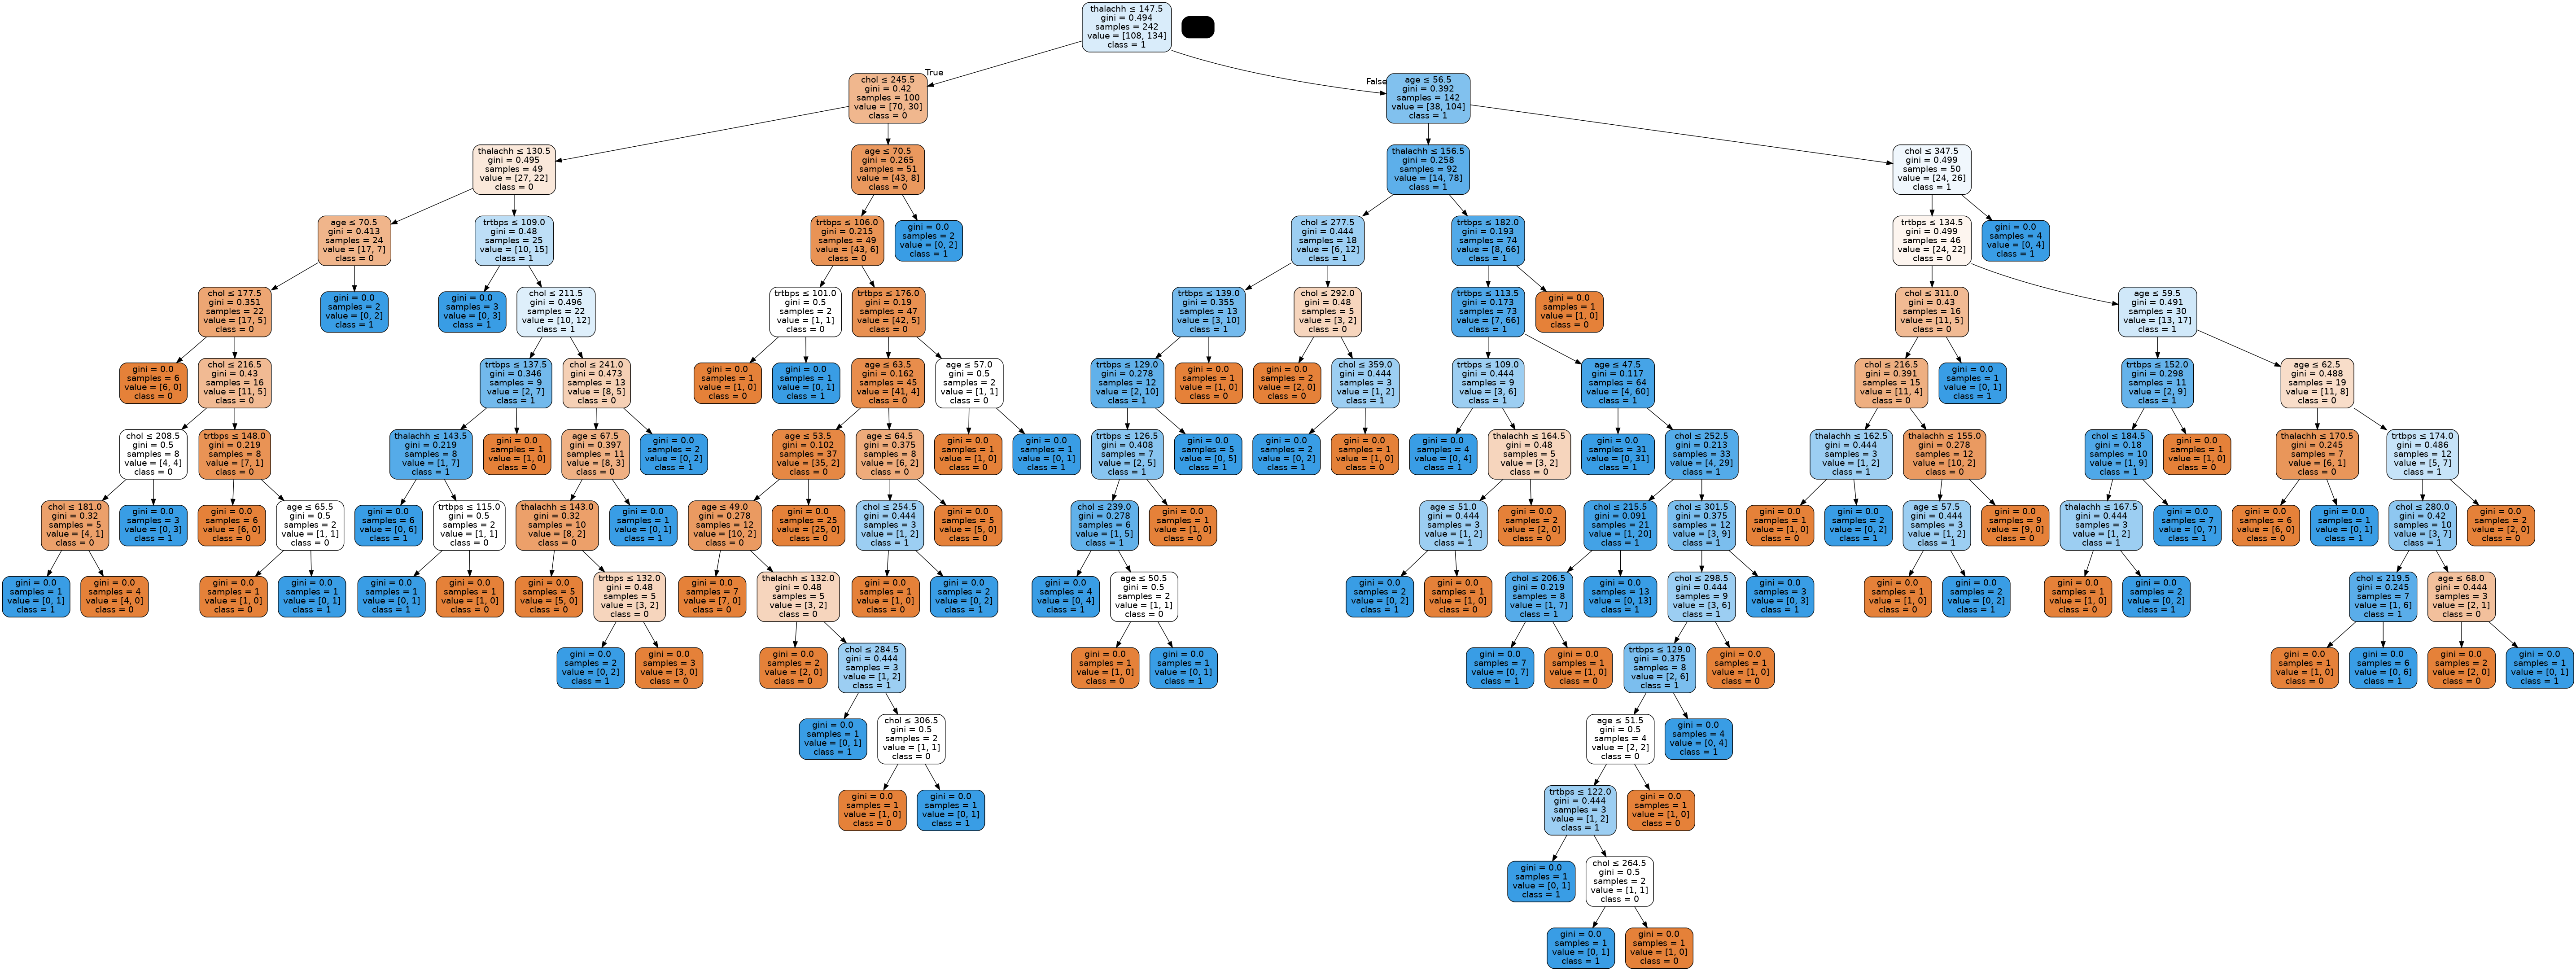

In [38]:
heart_tree_classifier = DecisionTreeClassifier(random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(features_X, target_Y, test_size=0.2, random_state=1)
heart_tree_model = heart_tree_classifier.fit(X_train,y_train)

y_pred = heart_tree_model.predict(X_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()

export_graphviz(heart_tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_column_names,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data/heart_attack_tree_80_20_no_hyper.png')
Image(graph.create_png())




# Decision Tree Visualization Test - Train Split (80 / 20) | Criterion = Entropy , Max Depth = 2 |

Model Accuracy: 0.6885245901639344


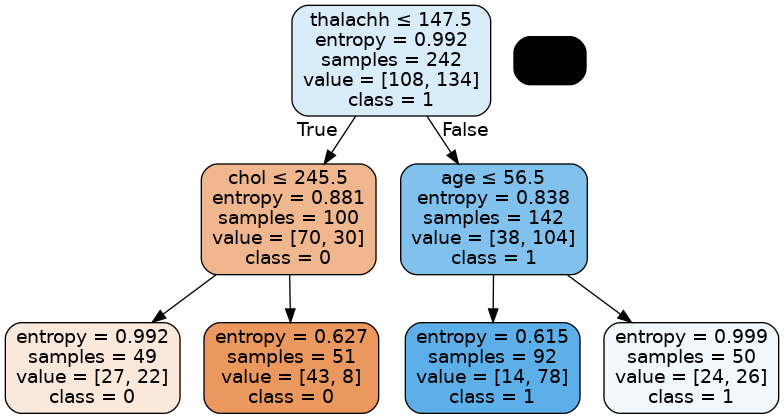

In [39]:
heart_tree_classifier = DecisionTreeClassifier(random_state=1234,criterion="entropy",max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(features_X, target_Y, test_size=0.2, random_state=1)
heart_tree_model = heart_tree_classifier.fit(X_train,y_train)

y_pred = heart_tree_model.predict(X_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()

export_graphviz(heart_tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_column_names,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data/heart_attack_tree_train_80_20_entropy.png')
Image(graph.create_png())

